In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # 评估指标：轮廓系数
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#### 数据范围：2021/08/01-2022/07/31在RG成功付款的用户
#### 数据量：114852
#### 实际用到数据量：114857(剔除5个离群点)

In [101]:
r1=open('RFM_data/RFM_k-means取数_360_1.csv')
r2=open('RFM_data/RFM_k-means取数_360_2.csv')
rfm1=pd.read_csv(r1)
rfm2=pd.read_csv(r2)
rfm=pd.concat((rfm1,rfm2), axis=0)

In [102]:
rfm.head(20)

,user_id,Recency,Frequency,Monetary
0,19542306,42,176,12856.79
1,20489490,4,84,8347.63
2,21839121,54,59,7032.09
3,10402254,1,54,4920.59
4,20172770,2,45,4867.34
5,21966276,7,18,4497.85
6,20583030,3,39,4468.95
7,7808288,101,103,4314.86
8,9439233,3,25,3960.09
9,16729361,22,25,3959.60


In [103]:
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,1.148520e+05,114852.000000,114852.000000,114852.000000
mean,1.899346e+07,155.412792,1.407316,107.555560
std,5.009870e+06,107.726013,1.371132,136.393973
min,7.638000e+03,0.000000,1.000000,7.780000
25%,1.826422e+07,62.000000,1.000000,44.480000
50%,2.187334e+07,126.000000,1.000000,71.325000
75%,2.207148e+07,254.000000,1.000000,123.360000
max,2.223546e+07,364.000000,176.000000,12856.790000


C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


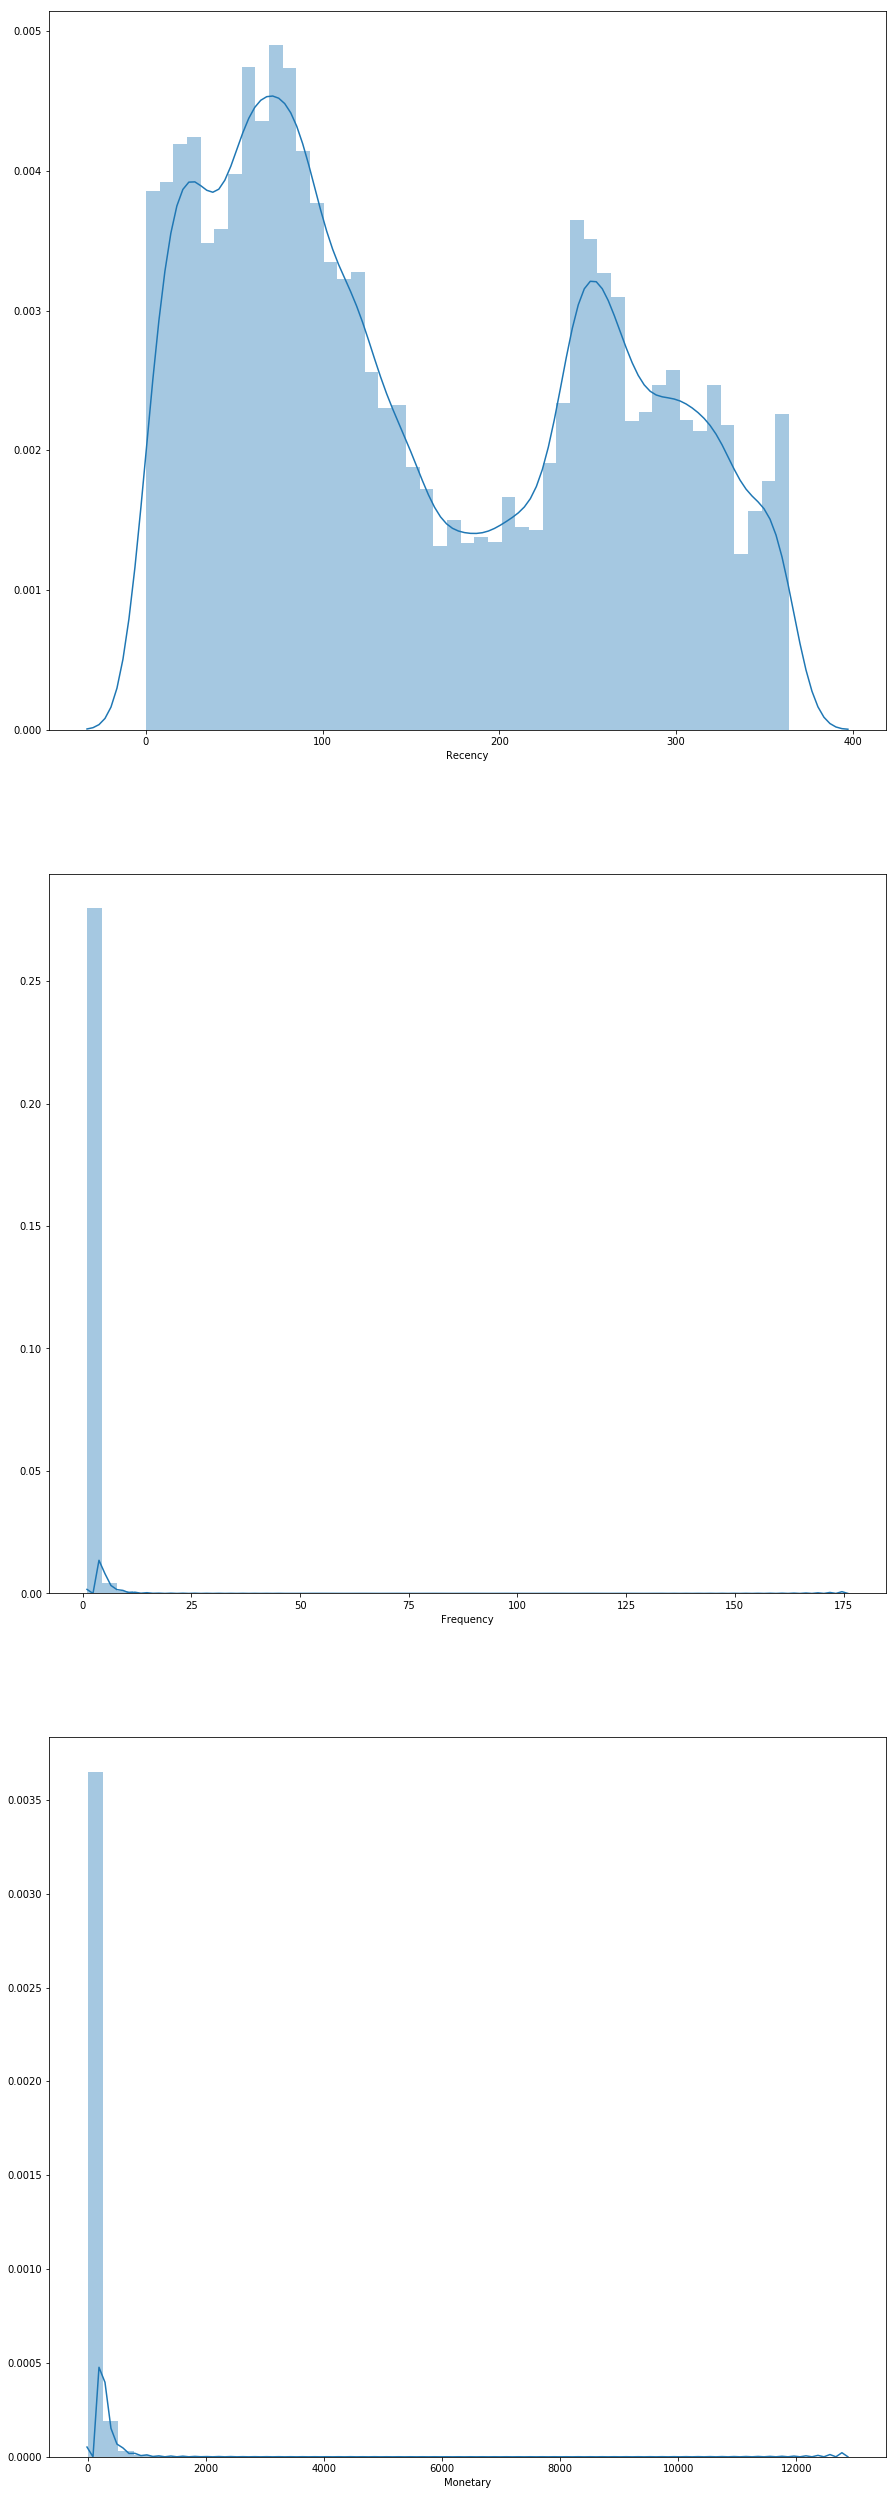

In [104]:
#各变量直方分布图
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.distplot(rfm['Recency'], ax=ax[0])
sns.distplot(rfm['Frequency'], ax=ax[1])
sns.distplot(rfm['Monetary'], ax=ax[2])

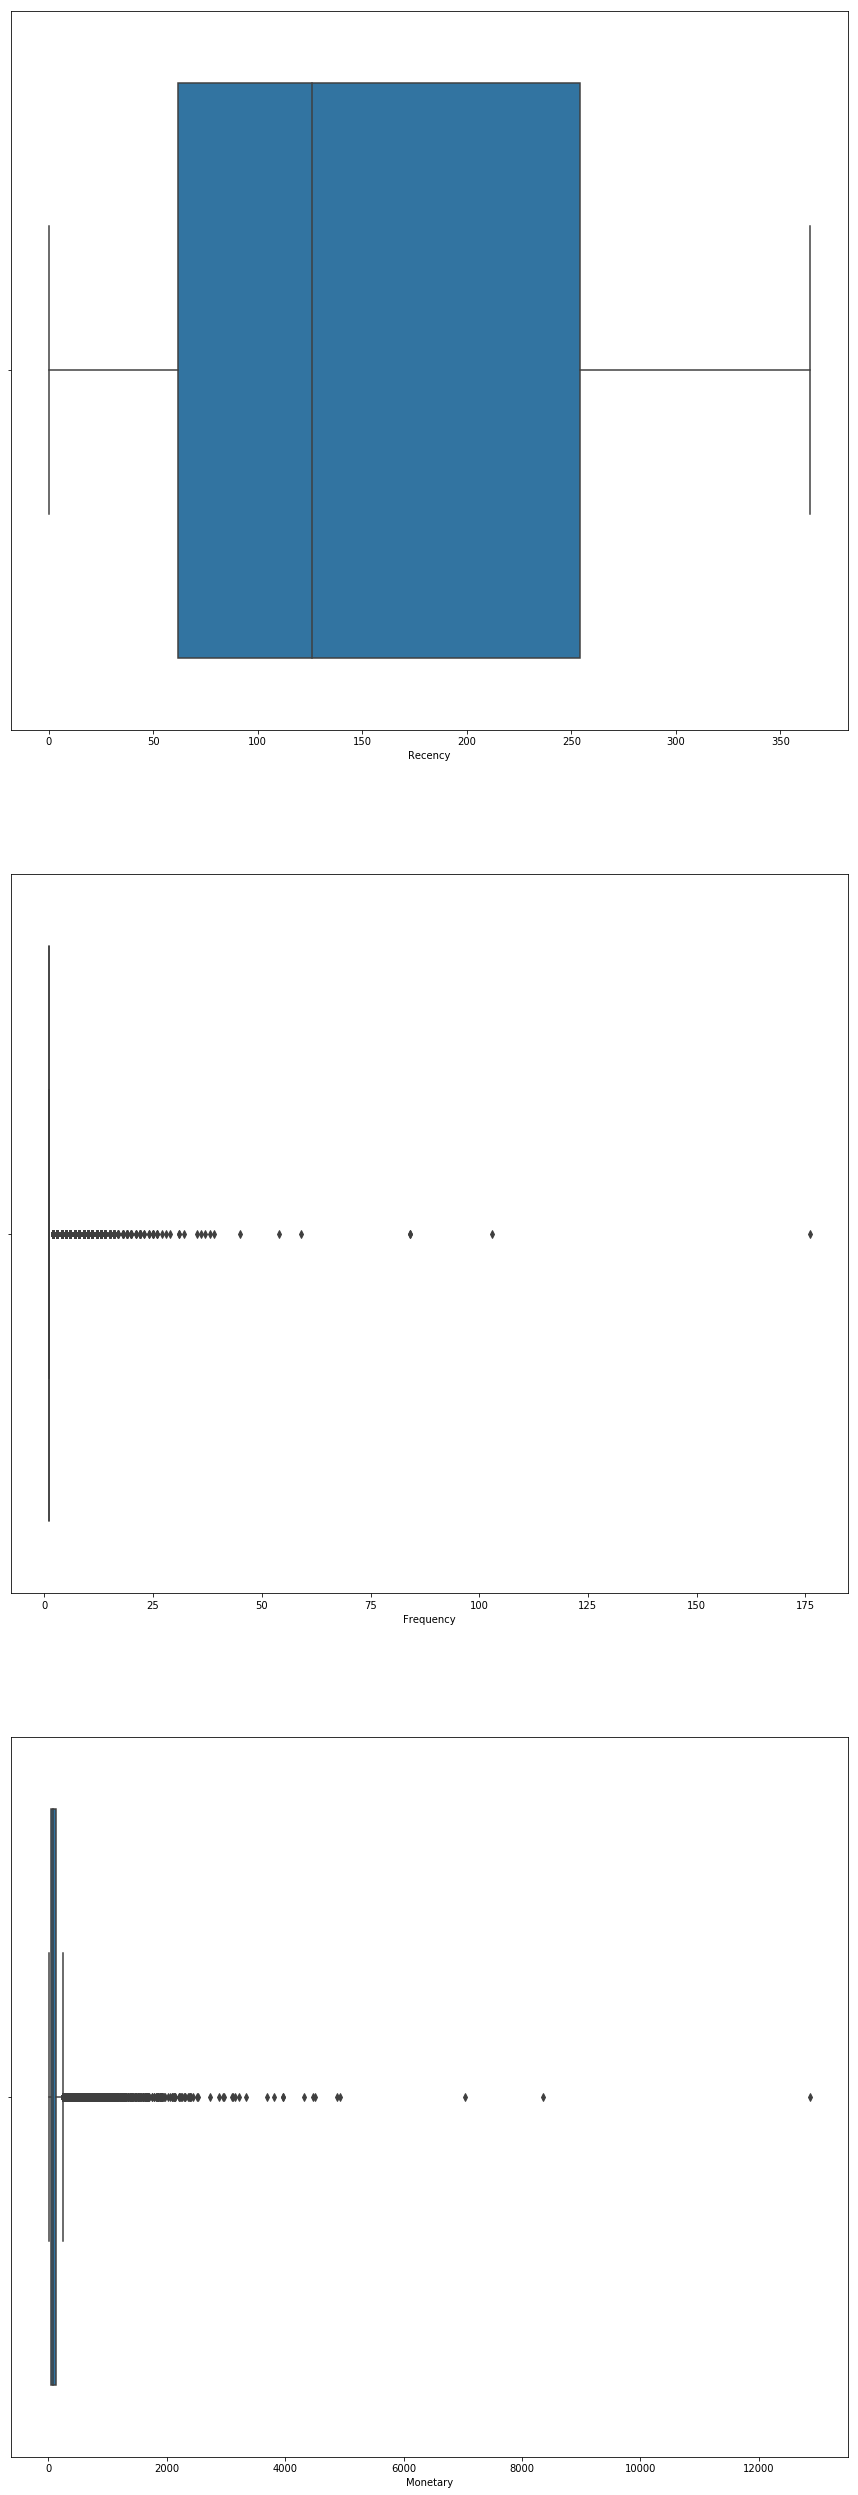

In [105]:
# 各变量箱线图 查看离群点
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

In [106]:
# drop掉一些离群点
# rfm.drop(index=rfm[rfm['Monetary']>6000].index[0], axis=0, inplace=True)
# rfm.drop(index=rfm[rfm['Frequency']>80].index[0], axis=0, inplace=True)
rfm=rfm[rfm['Monetary']<=6000]
rfm=rfm[rfm['Frequency']<=80]

In [107]:
# 剔除离群点后
rfm.head(20)

,user_id,Recency,Frequency,Monetary
3,10402254,1,54,4920.59
4,20172770,2,45,4867.34
5,21966276,7,18,4497.85
6,20583030,3,39,4468.95
8,9439233,3,25,3960.09
9,16729361,22,25,3959.60
10,11983810,43,22,3803.36
11,22114857,17,35,3689.29
12,19885400,164,12,3343.90
14,21905713,226,7,3160.37


In [108]:
# 剔除离群点后 剩下114847个数
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,1.148470e+05,114847.000000,114847.000000,114847.000000
mean,1.899350e+07,155.417773,1.402971,107.248780
std,5.009856e+06,107.725450,1.173499,126.259874
min,7.638000e+03,0.000000,1.000000,7.780000
25%,1.826419e+07,62.000000,1.000000,44.480000
50%,2.187350e+07,126.000000,1.000000,71.320000
75%,2.207149e+07,254.000000,1.000000,123.360000
max,2.223546e+07,364.000000,54.000000,4920.590000


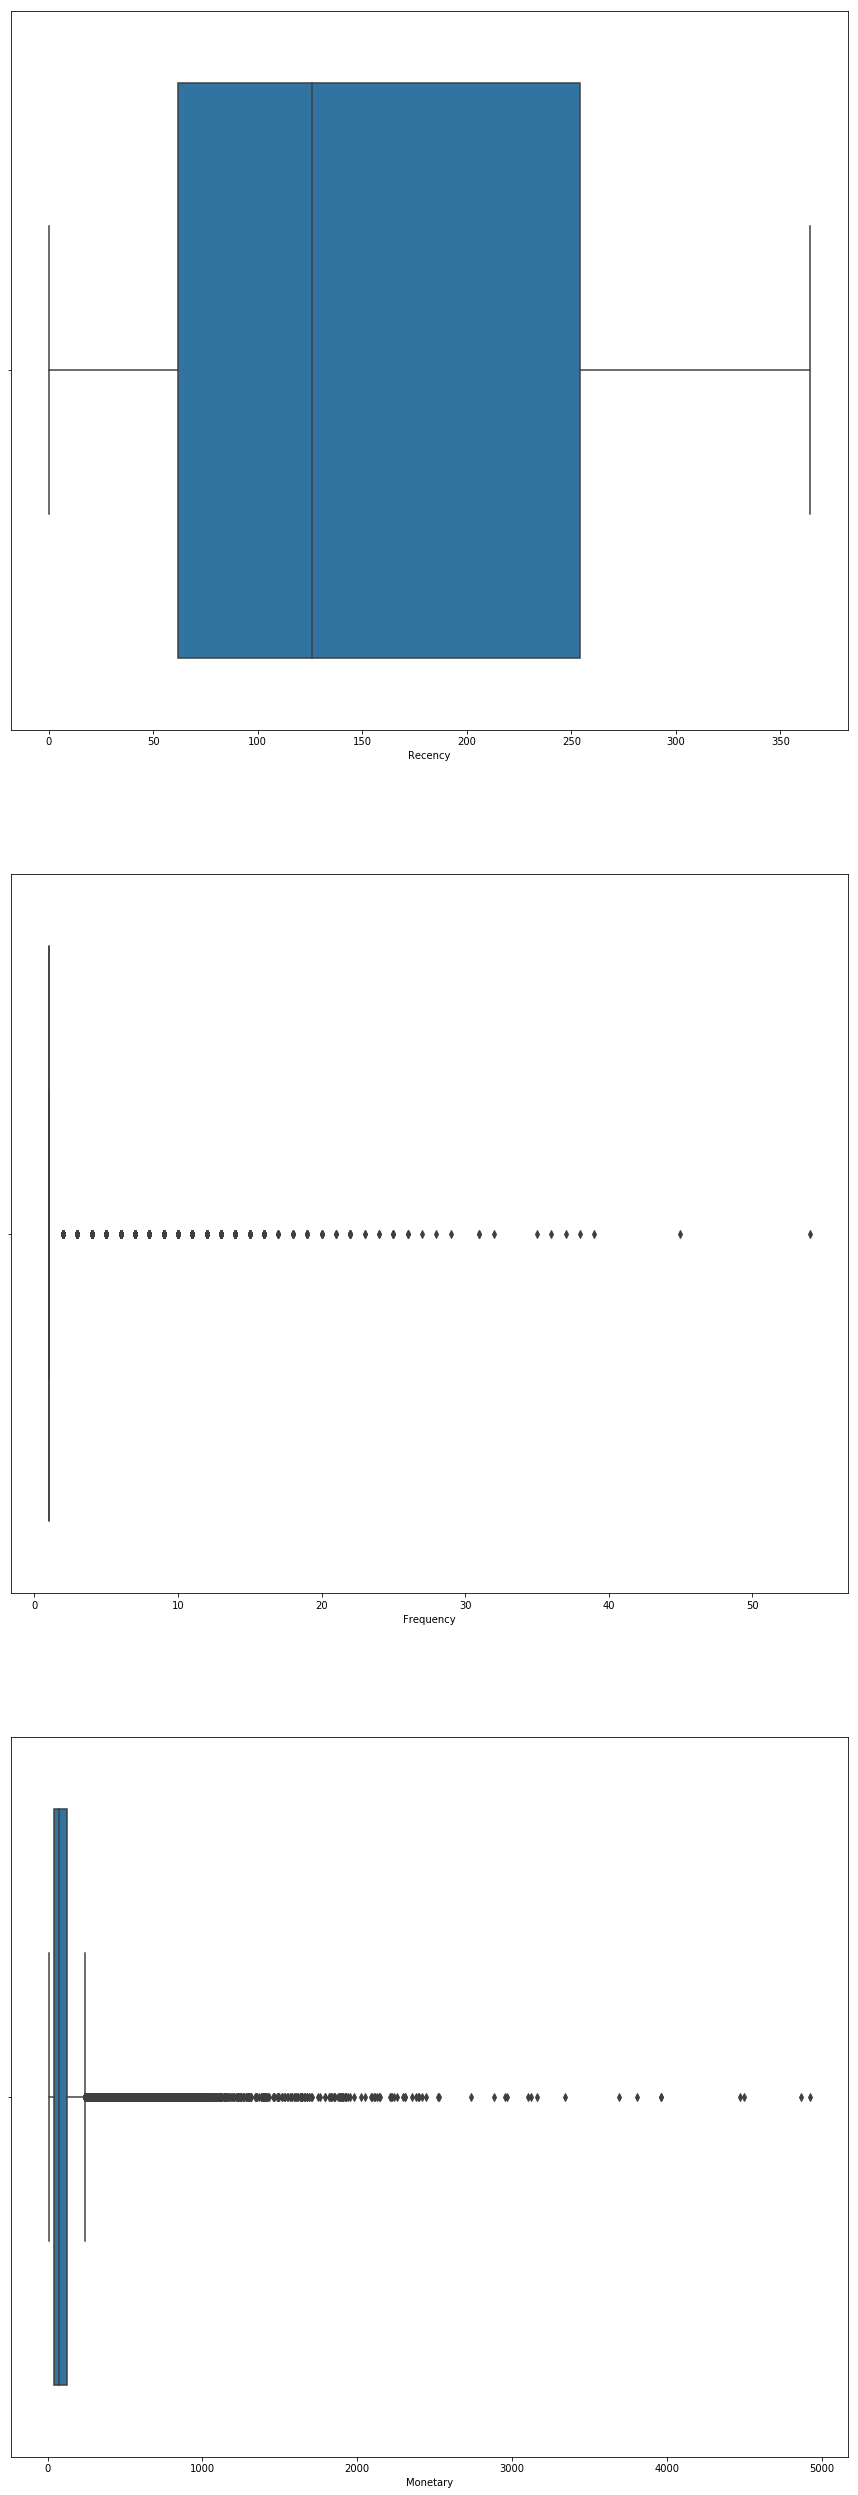

In [109]:
# 剔除离群点后
# 各变量箱线图 
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

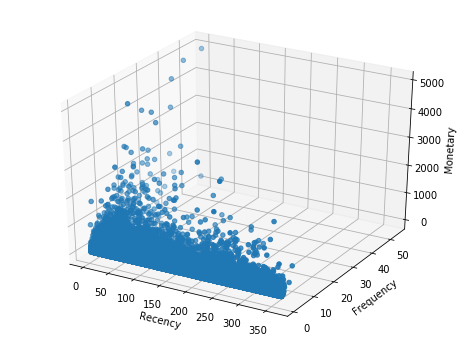

In [110]:
# 初始数据
# %matplotlib notebook  #可旋转，放大缩小。但数据量较大有延迟
# 静态图
%matplotlib inline 

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
ax.scatter(rfm['Recency'],rfm['Frequency'],rfm['Monetary'])
ax.set_xlabel('Recency') # 画出坐标轴
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [111]:
# 数据标准化/归一化
# StandardScaler和MinMaxScaler：前者适用于正态分布的数据，后者适用于分布范围较稳定的数据，当新数据的加入导致max/min变化，则需重新定义；前者对outlier些许敏感，后者对outlier非常敏感

scaler=StandardScaler()
rfm_scale=scaler.fit_transform(rfm.loc[:, 'Recency':'Monetary']) #fit找出rfm的均值和标准差，transform将标准化规则运用在rfm上

rfm_scale=pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'], index=rfm.index)
rfm_scale.head()

,Recency,Frequency,Monetary
3,-1.433444,44.820867,38.122659
4,-1.424162,37.151464,37.700908
5,-1.377747,14.143256,34.774471
6,-1.414879,32.038529,34.545577
8,-1.414879,20.108347,30.515301


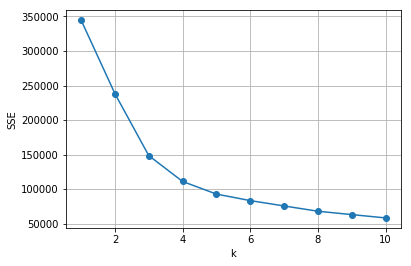

In [112]:
# 手肘法
# k值的选取，确定分为几类
SSE = [] # 存放每次结果的误差平方和
fig=plt.figure()
for k in range(1,11): 
    estimator = KMeans(n_clusters=k, random_state=360) # 构造聚类器 
    estimator.fit(rfm_scale) 
    SSE.append(estimator.inertia_)
X = range(1,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.grid()
plt.show()

# 图示可以看出，离群点的剔除有助于进一步缩小SSE

## k=5

In [113]:
kmodel5=KMeans(n_clusters=5, random_state=360) #k=5,分为k类。设置随机种子固定每次聚类的结果
kmodel5.fit(rfm_scale) #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=360, tol=0.0001, verbose=0)

In [114]:
# 实际迭代次数
print(kmodel5.n_iter_)

29


In [115]:
# 查看聚类中心
center_360_5=pd.DataFrame(kmodel5.cluster_centers_, columns=['Recency','Frequency','Monetary'])
print(center_360_5)

    Recency  Frequency   Monetary
0 -0.438610   1.049393   1.073343
1 -0.736984  -0.244464  -0.272356
2  1.114552  -0.252977  -0.210415
3 -0.883060  12.355053  11.912918
4 -0.591870   3.833491   3.623434


In [116]:
#统计各个类别的数目
r2 = pd.Series(kmodel5.labels_).value_counts() 
print(r2)

1    56192
2    43516
0    12561
4     2385
3      193
dtype: int64


In [117]:
# 获取每个样本所属的簇/类别
r3 = pd.DataFrame(kmodel5.labels_, columns=['label'], index=rfm.index)
print(r3)

       label
3          3
4          3
5          3
6          3
8          3
9          3
10         3
11         3
12         3
14         3
15         3
16         3
17         3
18         3
19         3
20         3
21         3
22         3
23         3
24         3
25         3
26         3
27         3
28         3
29         3
30         3
31         3
32         3
33         3
34         3
...      ...
14824      1
14825      1
14826      1
14827      1
14828      1
14829      1
14830      1
14831      1
14832      1
14833      1
14834      1
14835      1
14836      1
14837      1
14838      1
14839      1
14840      1
14841      2
14842      1
14843      1
14844      1
14845      1
14846      1
14847      1
14848      1
14849      1
14850      1
14851      1
14852      1
14853      1

[114847 rows x 1 columns]


In [118]:
# 得到打好标签的用户数据，可输出csv
rfm_label5 = pd.concat([rfm, r3], axis=1)
rfm_label5.head(200)

,user_id,Recency,Frequency,Monetary,label
3,10402254,1,54,4920.59,3
4,20172770,2,45,4867.34,3
5,21966276,7,18,4497.85,3
6,20583030,3,39,4468.95,3
8,9439233,3,25,3960.09,3
9,16729361,22,25,3959.60,3
10,11983810,43,22,3803.36,3
11,22114857,17,35,3689.29,3
12,19885400,164,12,3343.90,3
14,21905713,226,7,3160.37,3


<IPython.core.display.Javascript object>


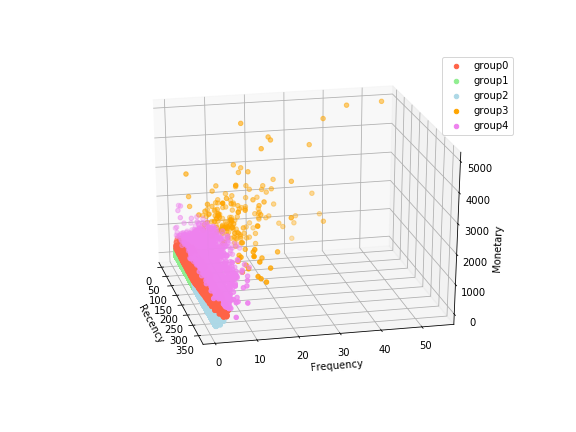

In [120]:
# 群体分层后的三维散点图,可旋转，数据量较大有延迟
%matplotlib notebook

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
color=['tomato','lightgreen','lightblue','orange','violet']
for i in range(5):
    d = rfm_label5[rfm_label5.label==i]
    ax.scatter(d['Recency'],d['Frequency'],d['Monetary'],color=color[i],label=f"group{i}")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.legend()

### 聚类中心点还原

In [121]:
ms360=rfm.describe()[1:3].drop(['user_id'], axis=1)
ms360

,Recency,Frequency,Monetary
mean,155.417773,1.402971,107.248780
std,107.725450,1.173499,126.259874


In [122]:
center_360_5

,Recency,Frequency,Monetary
0,-0.438610,1.049393,1.073343
1,-0.736984,-0.244464,-0.272356
2,1.114552,-0.252977,-0.210415
3,-0.883060,12.355053,11.912918
4,-0.591870,3.833491,3.623434


In [123]:
a=pd.DataFrame()

for i in range(3):
    a[i]=center_360_5.iloc[:,i].values*ms360.iloc[1,i]+ms360.iloc[0,i]

center_360_5_reverse=pd.DataFrame(a, index=center_360_5.index)
center_360_5_reverse.columns=['R','F','M']
center_360_5_reverse

,R,F,M
0,108.168276,2.634433,242.768947
1,76.025878,1.116093,72.861192
2,275.483425,1.106102,80.681831
3,60.289741,15.901618,1611.372248
4,91.658290,5.901570,564.743094


In [124]:
kmodel5.lablecount=pd.DataFrame(pd.Series(kmodel5.labels_).value_counts() , columns=['count'])
kmodel5.lablecount

,count
1,56192
2,43516
0,12561
4,2385
3,193


In [125]:
# 各簇中心点、数量
center_360_5_count=pd.concat((center_360_5_reverse,kmodel5.lablecount), axis=1)
center_360_5_count.sort_values(by='count', inplace=True)
center_360_5_count=center_360_5_count.round({'R':2,'F':2,'M':2})
center_360_5_count

,R,F,M,count
3,60.29,15.90,1611.37,193
4,91.66,5.90,564.74,2385
0,108.17,2.63,242.77,12561
2,275.48,1.11,80.68,43516
1,76.03,1.12,72.86,56192


In [127]:
center_360_5_count.to_csv('RFM_data/center_360_5_count')

In [126]:
rfm_label5.to_csv('RFM_data/rfm_label5')